# Corto 1

## Integrantes

### Sergio Orellana - 221122

### Andre Marroquin - 22266

### Rodrigo Mansilla - 22611

# Link del repositorio

https://github.com/mar22266/LABORATORIOS-IA.git

# Link Video


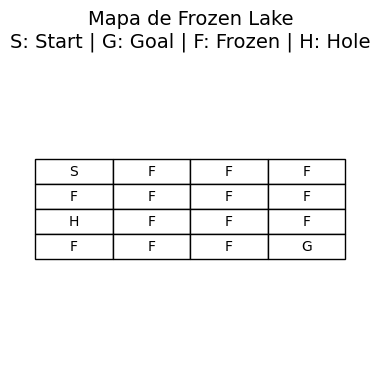

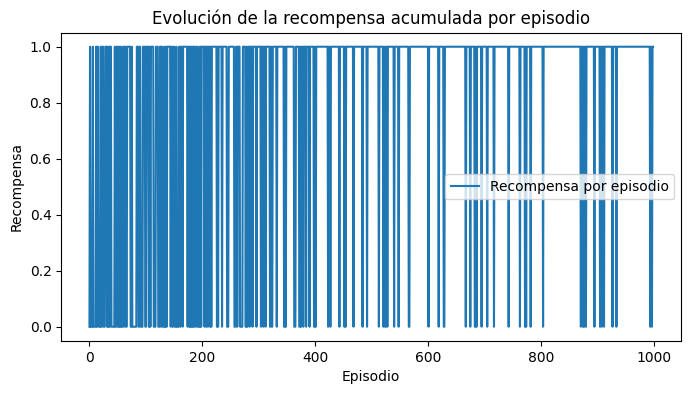


Desempeño del agente tras el entrenamiento: 87 victorias en 100 episodios de prueba (tasa de éxito = 87.00%).

Política aprendida (acción óptima por estado):
[[1 1 2 2]
 [3 1 2 1]
 [0 2 1 2]
 [2 3 2 0]]

Leyenda de acciones:
0: Mover a la izquierda
1: Mover hacia abajo
2: Mover a la derecha
3: Mover hacia arriba


In [15]:
# Importar las librerías necesarias
import numpy as np
import gymnasium as gym
from gymnasium.envs.toy_text.frozen_lake import generate_random_map
import matplotlib.pyplot as plt

def plot_map(map_data):
    nrows = len(map_data)
    ncols = len(map_data[0])
    
    # Crear figura y ejes sin mostrar 
    fig, ax = plt.subplots(figsize=(ncols, nrows))
    ax.axis('off')
    
    # Convertir cada fila del mapa en una lista de caracteres
    table_data = [list(row) for row in map_data]
    
    # Crear la tabla con los datos del mapa
    table = ax.table(cellText=table_data, loc='center', cellLoc='center')
    table.scale(1, 1.5)
    
    # Agregar el título con la leyenda de los estados
    ax.set_title("Mapa de Frozen Lake\nS: Start | G: Goal | F: Frozen | H: Hole", fontsize=14)
    
    plt.show()

# Definir el tamaño del mapa
map_size = 4  

# Generar un mapa aleatorio de 4x4 (80% de casillas congeladas)
random_map = generate_random_map(size=map_size, p=0.8)

# Crear el entorno de FrozenLake con el mapa generado
env = gym.make("FrozenLake-v1", desc=random_map, is_slippery=True)

# Visualizar la matriz del mapa como imagen
plot_map(random_map)

# Inicializar la tabla Q (Q-table) con ceros
n_states = env.observation_space.n   # 16 estados
n_actions = env.action_space.n       # 4 acciones
Q_table = np.zeros((n_states, n_actions))

# Definir los hiperparámetros del algoritmo Q-learning
alpha = 0.1          # Tasa de aprendizaje 
gamma = 0.99         # Factor de descuento 
epsilon = 1.0        # Probabilidad inicial de exploración  epsilon-greedy
epsilon_min = 0.01   # Valor mínimo de epsilon
epsilon_decay = 0.995# Factor de decaimiento de epsilon por episodio
num_episodes = 1000  # Número de episodios de entrenamiento

# Lista para almacenar la recompensa total de cada episodio 
rewards_per_episode = []

# Entrenamiento con Q-learning
for episode in range(num_episodes):
    state, info = env.reset()   # Reiniciar el entorno para cada episodio
    done = False
    total_reward = 0
    
    while not done:
        # Con probabilidad epsilon se elige una acción aleatoria 
        if np.random.random() < epsilon:
            action = env.action_space.sample()
        else:
            # Con probabilidad 1 - epsilon se elige la acción con mayor valor Q explotación
            action = np.argmax(Q_table[state])
        
        # Ejecutar la acción y obtener el siguiente estado, recompensa y condición de finalización
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated  # El episodio termina si se alcanza la meta, se cae en un agujero o se agota el tiempo
        
        # Actualización de la Q-table usando la fórmula del Q-learning:
        max_next_Q = np.max(Q_table[next_state])
        td_target = reward + gamma * max_next_Q
        td_error = td_target - Q_table[state, action]
        Q_table[state, action] += alpha * td_error
        
        total_reward += reward
        state = next_state
    
    # Reducir epsilon gradualmente para disminuir la exploración a medida que se aprende
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
        if epsilon < epsilon_min:
            epsilon = epsilon_min
    
    rewards_per_episode.append(total_reward)

# Visualización de la recompensa acumulada por episodio durante el entrenamiento
plt.figure(figsize=(8, 4))
plt.plot(rewards_per_episode, label="Recompensa por episodio")
plt.title("Evolución de la recompensa acumulada por episodio")
plt.xlabel("Episodio")
plt.ylabel("Recompensa")
plt.legend()
plt.show()

# Evaluación del agente entrenado
test_episodes = 100
success_count = 0

for i in range(test_episodes):
    state, info = env.reset()
    done = False
    while not done:
        action = np.argmax(Q_table[state]) 
        next_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated
        state = next_state
        if done and reward == 1.0:
            # Se considera victoria si al finalizar el episodio se alcanza la meta 
            success_count += 1

success_rate = success_count / test_episodes
print(f"\nDesempeño del agente tras el entrenamiento: {success_count} victorias en {test_episodes} episodios de prueba (tasa de éxito = {success_rate*100:.2f}%).")

# Mostrar la política óptima aprendida acción óptima por estado
optimal_policy = np.argmax(Q_table, axis=1).reshape((map_size, map_size))
print("\nPolítica aprendida (acción óptima por estado):")
print(optimal_policy)

# Definición de cada número 
print("\nLeyenda de acciones:")
print("0: Mover a la izquierda")
print("1: Mover hacia abajo")
print("2: Mover a la derecha")
print("3: Mover hacia arriba")
